<a href="https://colab.research.google.com/github/mmorra13/Intro-To-ML/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch as torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.nn.functional import normalize
import torch.optim as optim
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#PROBLEM 1
#DATA FROM SLIDES
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = normalize(t_u, p=0, dim=0)
t_un

tensor([3.2455, 5.0818, 5.2909, 7.4455, 5.1182, 4.4455, 3.0818, 1.9818, 4.4000,
        5.4909, 6.2182])

In [ ]:
#Define non-linear model
def model1(t_u, w2, w1, b) :
  return w2*t_u**2+w1*t_u+b

In [ ]:
#Define loss
def loss_fn(t_p, t_c) :
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [ ]:
#Define training loop
def training_loop(n_epochs, optimizer, params1, t_u, t_c):
  for epoch in range(1, n_epochs + 1) :
    t_p = model1(t_u, *params1)
    loss = loss_fn(t_p, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))

  return params1

In [ ]:
params1 = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
model1(t_u, *params1)

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600],
       grad_fn=<AddBackward0>)

In [ ]:
params1 = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 0.001 #Vary from 0.1 to 0.0001 -> Choose best (0.001 is best)
optimizerSGD = optim.SGD([params1], lr=learning_rate)

#Training with SGD optimizer
training_loop(
    n_epochs = 5000,
    optimizer = optimizerSGD,
    params1 = params1,
    t_u = t_un,
    t_c = t_c)


Epoch 500, Loss 4.023893
Epoch 1000, Loss 3.485114
Epoch 1500, Loss 3.421723
Epoch 2000, Loss 3.385779
Epoch 2500, Loss 3.352207
Epoch 3000, Loss 3.319582
Epoch 3500, Loss 3.287806
Epoch 4000, Loss 3.256852
Epoch 4500, Loss 3.226698
Epoch 5000, Loss 3.197325


tensor([ 0.7060, -0.9193, -2.2191], requires_grad=True)

In [ ]:
params1 = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
learning_rate = 0.1 #Vary from 0.1 to 0.0001 -> Choose best (0.1 is best)
optimizerAdam = optim.Adam([params1], lr=learning_rate)

#Training with Adam optimizer
training_loop(
    n_epochs = 5000,
    optimizer = optimizerAdam,
    params1 = params1,
    t_u = t_u,
    t_c = t_c)

Epoch 500, Loss 4.844501
Epoch 1000, Loss 3.785644
Epoch 1500, Loss 3.466676
Epoch 2000, Loss 3.406405
Epoch 2500, Loss 3.377975
Epoch 3000, Loss 3.344335
Epoch 3500, Loss 3.301921
Epoch 4000, Loss 3.249141
Epoch 4500, Loss 3.184418
Epoch 5000, Loss 3.106353


tensor([ 0.0057, -0.0683, -2.5687], requires_grad=True)

In [ ]:
#Visualize
#Linear from lecture
lin_lec = [0.5367, -17.3021]

#From above code
nonlin_SGD = [0.7060, -0.9193, -2.2191]
nonlin_Adam = [0.0057, -0.0683, -2.5687]

pred1 = t_u*lin_lec[0]+lin_lec[1]
pred2 = nonlin_Adam[0]*t_u**2+nonlin_Adam[1]*t_u+nonlin_Adam[2]

Text(0, 0.5, 'Temperature - Celsius')

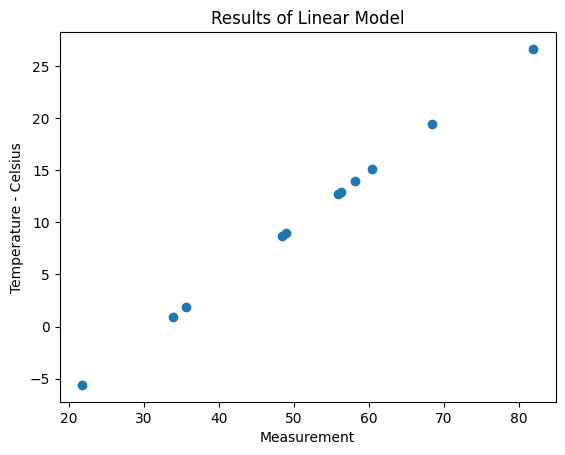

In [ ]:
plt.scatter(t_u, pred1)
plt.title('Results of Linear Model')
plt.xlabel("Measurement")
plt.ylabel('Temperature - Celsius')

Text(0, 0.5, 'Temperature - Celsius')

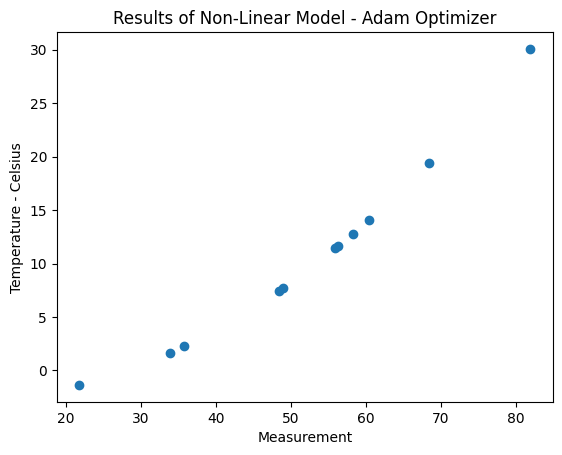

In [ ]:
plt.scatter(t_u,pred2)
plt.title('Results of Non-Linear Model - Adam Optimizer')
plt.xlabel("Measurement")
plt.ylabel('Temperature - Celsius')

In [3]:
#PROBLEM 2
# Load the housing dataset
file_path = '/content/drive/My Drive/Courses/Intro-to-ML/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))

In [4]:
varlist2 = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

#Defining map function
def binary_map(x):
  return x.map({'yes': 1, 'no': 0})

#Applying the function to the housing list
housing[varlist2] = housing[varlist2].apply(binary_map)

In [5]:
#Standardizing non-binary input values
sc = StandardScaler()
num_vars2 = ['area','bedrooms','bathrooms','stories','parking']
housing[num_vars2] = sc.fit_transform(housing[num_vars2])
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,furnished
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,furnished
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,semi-furnished
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,furnished
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,furnished


In [6]:
#Extracting desired inputs
inputs1 = ['area','bedrooms','bathrooms','stories','parking']
X2 = torch.tensor(housing[inputs1].values)

#Extraction output
Y2 = torch.tensor(housing['price'].values)

#Split the dataset into training and test, 80-20 split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)

In [7]:
#Define non-linear model
def model2(X2, w5, w4, w3, w2, w1, b) :
  return w5*X2[:,0]+w4*X2[:,1]+w3*X2[:,2]+w2*X2[:,3]+w1*X2[:,4]+b

#Define loss
def loss_fn2(Pred, Known) :
  squared_diffs = (Pred - Known)**2
  return squared_diffs.mean()

#Define training loop
def training_loop2(n_epochs, optimizer, params2, X2_train, X2_test, Y2_train, Y2_test):
  for epoch in range(1, n_epochs + 1) :
    train_Y2_pred = model2(X2_train, *params2)
    train_loss = loss_fn2(train_Y2_pred, Y2_train)

    test_Y2_pred = model2(X2_test, *params2)
    test_loss = loss_fn2(test_Y2_pred, Y2_test)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch <= 3 or epoch % 500 == 0:
      print(f"Epoch {epoch}, Training Loss {train_loss.item():.4f},"
            f" Validation Loss {test_loss.item():.4f}")

  return params2

In [16]:
params2 = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate2 = 0.0001 #Vary from 0.1 to 0.0001 -> Choose best (0.0001)
optimizerSGD = optim.SGD([params2], lr=learning_rate2)

#Training with SGD optimizer
training_loop2(
    n_epochs = 5000,
    optimizer = optimizerSGD,
    params2 = params2,
    X2_train = X2_train,
    X2_test = X2_test,
    Y2_train = Y2_train,
    Y2_test = Y2_test)

Epoch 1, Training Loss 26469971396352.9688, Validation Loss 25189236479478.2383
Epoch 2, Training Loss 26459356459463.4297, Validation Loss 25178927956966.6367
Epoch 3, Training Loss 26448746294663.2695, Validation Loss 25168624078137.2930
Epoch 500, Training Loss 21721544724190.3125, Validation Loss 20578815608681.5000
Epoch 1000, Training Loss 17907439573826.0898, Validation Loss 16876931915449.6328
Epoch 1500, Training Loss 14840864553446.3867, Validation Loss 13901528105174.6289
Epoch 2000, Training Loss 12368429626897.8926, Validation Loss 11503320464338.2930
Epoch 2500, Training Loss 10370208533784.9375, Validation Loss 9565708012630.5742
Epoch 3000, Training Loss 8751885912093.7295, Validation Loss 7997053804335.7559
Epoch 3500, Training Loss 7438871927483.5938, Validation Loss 6724919095228.8896
Epoch 4000, Training Loss 6371920037532.4717, Validation Loss 5691779844126.8623
Epoch 4500, Training Loss 5503751346527.4814, Validation Loss 4851733994232.2275
Epoch 5000, Training Lo

tensor([ 515989.9062,  256710.4375,  416680.6875,  377944.1562,  358333.9375,
        3017171.5000], requires_grad=True)

In [11]:
params2 = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate2 = 0.1 #Vary from 0.1 to 0.0001 -> Choose best (0.1)
optimizerAdam = optim.Adam([params2], lr=learning_rate2)

#Training with Adam optimizer
training_loop2(
    n_epochs = 5000,
    optimizer = optimizerAdam,
    params2 = params2,
    X2_train = X2_train,
    X2_test = X2_test,
    Y2_train = Y2_train,
    Y2_test = Y2_test)

Epoch 1, Training Loss 26469971396352.9688, Validation Loss 25189236479478.2383
Epoch 2, Training Loss 26469969583735.4570, Validation Loss 25189234805053.6953
Epoch 3, Training Loss 26469967771118.0234, Validation Loss 25189233130629.2383
Epoch 500, Training Loss 26469066939676.5703, Validation Loss 25188400979960.2031
Epoch 1000, Training Loss 26468160750841.1641, Validation Loss 25187563884247.6641
Epoch 1500, Training Loss 26467254605322.7734, Validation Loss 25186726832345.7148
Epoch 2000, Training Loss 26466348500311.3633, Validation Loss 25185889820530.3125
Epoch 2500, Training Loss 26465442457656.5625, Validation Loss 25185052872774.3984
Epoch 3000, Training Loss 26464536510080.1602, Validation Loss 25184216013943.6758
Epoch 3500, Training Loss 26463630616297.7891, Validation Loss 25183379210160.0000
Epoch 4000, Training Loss 26462724774760.3086, Validation Loss 25182542459965.1016
Epoch 4500, Training Loss 26461818985467.7148, Validation Loss 25181705763358.9766
Epoch 5000, Tr

tensor([500.9215, 500.9025, 500.9174, 500.9163, 500.9199, 500.0212],
       requires_grad=True)

In [24]:
#Extracting desired inputs
inputs2 = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','parking']
X3 = torch.tensor(housing[inputs2].values)

#Extraction output
Y3 = torch.tensor(housing['price'].values)

#Split the dataset into training and test, 80-20 split
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.2, random_state = 0)

In [25]:
#Define non-linear model
def model3(X2, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b) :
  return w11*X2[:,0]+w10*X2[:,1]+w9*X2[:,2]+w8*X2[:,3]+w7*X2[:,4]+w6*X2[:,5]+w5*X2[:,6]+w4*X2[:,7]+w3*X2[:,8]+w2*X2[:,9]+w1*X2[:,10]+b

#Define loss
def loss_fn3(Pred, Known) :
  squared_diffs = (Pred - Known)**2
  return squared_diffs.mean()

#Define training loop
def training_loop3(n_epochs, optimizer, params3, X3_train, X3_test, Y3_train, Y3_test):
  for epoch in range(1, n_epochs + 1) :
    train_Y3_pred = model3(X3_train, *params3)
    train_loss = loss_fn3(train_Y3_pred, Y3_train)

    test_Y3_pred = model3(X3_test, *params3)
    test_loss = loss_fn3(test_Y3_pred, Y3_test)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch <= 3 or epoch % 500 == 0:
      print(f"Epoch {epoch}, Training Loss {train_loss.item():.4f},"
            f" Validation Loss {test_loss.item():.4f}")

  return params3

In [22]:
params3 = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate3 = 0.001 #Vary from 0.1 to 0.0001 -> Choose best (0.001)
optimizerSGD = optim.SGD([params3], lr=learning_rate3)

#Training with Adam optimizer
training_loop3(
    n_epochs = 5000,
    optimizer = optimizerSGD,
    params3 = params3,
    X3_train = X3_train,
    X3_test = X3_test,
    Y3_train = Y3_train,
    Y3_test = Y3_test)

Epoch 1, Training Loss 26469949822748.3516, Validation Loss 25189215889658.6133
Epoch 2, Training Loss 26248804901797.6055, Validation Loss 24976128139026.0820
Epoch 3, Training Loss 26029630358682.6133, Validation Loss 24764935539480.1641
Epoch 500, Training Loss 1842052104771.3584, Validation Loss 1470887087202.6306
Epoch 1000, Training Loss 1490066736257.2515, Validation Loss 1169943700902.4331
Epoch 1500, Training Loss 1446687296476.2190, Validation Loss 1139289477306.4670
Epoch 2000, Training Loss 1416168137549.8967, Validation Loss 1112700993562.7554
Epoch 2500, Training Loss 1390876305087.1760, Validation Loss 1088758419135.4839
Epoch 3000, Training Loss 1369196386303.3962, Validation Loss 1067605236080.6067
Epoch 3500, Training Loss 1350327312262.7959, Validation Loss 1049087272258.2427
Epoch 4000, Training Loss 1333763788405.9971, Validation Loss 1032956655951.7368
Epoch 4500, Training Loss 1319144212720.0845, Validation Loss 1018943669864.6891
Epoch 5000, Training Loss 130619

tensor([ 472819.5312,  141679.2188,  531116.0000,  339450.9062, 1364196.8750,
         401562.5312,  460106.5000,  478394.2812,  927094.2500,  635910.8750,
         179268.5781, 2852316.7500], requires_grad=True)

In [26]:
params3 = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate3 = 0.01 #Vary from 0.1 to 0.0001 -> Choose best (0.01)
optimizerAdam = optim.Adam([params3], lr=learning_rate3)

#Training with Adam optimizer
training_loop3(
    n_epochs = 5000,
    optimizer = optimizerAdam,
    params3 = params3,
    X3_train = X3_train,
    X3_test = X3_test,
    Y3_train = Y3_train,
    Y3_test = Y3_test)

Epoch 1, Training Loss 26469949822748.3516, Validation Loss 25189215889658.6133
Epoch 2, Training Loss 26469949425750.9688, Validation Loss 25189215516318.3320
Epoch 3, Training Loss 26469949028753.5820, Validation Loss 25189215142978.0508
Epoch 500, Training Loss 26469751722942.8359, Validation Loss 25189029594602.4492
Epoch 1000, Training Loss 26469553225517.9180, Validation Loss 25188842925647.9375
Epoch 1500, Training Loss 26469354724950.9922, Validation Loss 25188656253696.7031
Epoch 2000, Training Loss 26469156225531.8438, Validation Loss 25188469582804.5273
Epoch 2500, Training Loss 26468957727219.4453, Validation Loss 25188282912934.1211
Epoch 3000, Training Loss 26468759230034.3086, Validation Loss 25188096244104.1328
Epoch 3500, Training Loss 26468560762365.5547, Validation Loss 25187909602924.1875
Epoch 4000, Training Loss 26468362305293.7109, Validation Loss 25187722971777.8203
Epoch 4500, Training Loss 26468163849348.6953, Validation Loss 25187536341671.4727
Epoch 5000, Tr

tensor([50.9973, 50.9973, 50.9973, 50.9973, 50.9973, 50.9973, 50.9973, 50.9973,
        50.9973, 50.9973, 50.9973, 49.9974], requires_grad=True)